![google](http://img.technews.tw/wp-content/uploads/2015/09/Google-logo_1.jpg)
**Google** is one of my dream company. I believe lots of data scientists want to join Google, just like me. However, people might wonder what I need to acquire to be qualified to work in Google. I create this kernel to answer this question. And hope you enjoy!

# Outline

[Exploratory](#0)   
[Functions](#12)

## Positions
[1. Analyst](#1)   
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Languages and Degrees](#1.1)   
[2. Developer](#2)   
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Languages and Degrees](#2.1)   
[3. MBA intern](#3)   
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Languages and Degrees](#3.1)   
[4. Sales](#4)   
&nbsp;&nbsp;&nbsp;&nbsp;[4.1 Languages and Degrees](#4.1)   
## Tools
[5. Microsoft Office](#5)   
[6. Data Visualization Tools](#6)   
[7. Statistical Analsis Tools](#7)

## Positions Distribution

[8. Jobs in the US](#8)   
[9. The so-called PMs](#9)   
[10. Pivot table](#10)

## [Conclusion](#11)

## Dataset Overlook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('../input/google-job-skills/job_skills.csv')

In [3]:
df.head()

,Company,Title,Category,Location,Responsibilities,Minimum Qualifications,Preferred Qualifications
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin..."
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...
3,Google,"Developer Advocate, Partner Engineering",Developer Relations,"Mountain View, CA, United States","Work one-on-one with the top Android, iOS, and...",BA/BS degree in Computer Science or equivalent...,"Experience as a software developer, architect,..."
4,Google,"Program Manager, Audio Visual (AV) Deployments",Program Management,"Sunnyvale, CA, United States",Plan requirements with internal customers.\nPr...,BA/BS degree or equivalent practical experienc...,CTS Certification.\nExperience in the construc...


In [4]:
# I modify the column name so that I can use df dot column name more easily
df = df.rename(columns={'Minimum Qualifications': 'Minimum_Qualifications', 'Preferred Qualifications': 'Preferred_Qualifications'})

I'll check if there is any NaN

In [5]:
pd.isnull(df).sum()

Company                      0
Title                        0
Category                     0
Location                     0
Responsibilities            15
Minimum_Qualifications      14
Preferred_Qualifications    14
dtype: int64

I'll straightly drop these rows with NaN

In [6]:
df = df.dropna(how='any',axis='rows')

Here, the first thing I want to check is the values_count of each column

In [7]:
df.Company.value_counts()

Google     1212
YouTube      23
Name: Company, dtype: int64

Ah! Right. I forgot that Youtube is also part of Google. However, for me, working in Youtube is not as appealing as working in Google. But Youtube is still a great company. No offence haha!

In [8]:
# So I drop Youtube
df = df[df.Company != 'YouTube']

In [9]:
df.Title.value_counts()[:10]

Business Intern 2018                          35
MBA Intern, Summer 2018                       34
MBA Intern 2018                               28
BOLD Intern, Summer 2018                      21
Field Sales Representative, Google Cloud      17
Interaction Designer                          12
User Experience Researcher                     9
User Experience Design Intern, Summer 2018     7
Partner Sales Engineer, Google Cloud           7
Recruiter                                      7
Name: Title, dtype: int64

In [10]:
df.Location.value_counts()[:10]

Mountain View, CA, United States    187
Sunnyvale, CA, United States        155
Dublin, Ireland                      87
New York, NY, United States          68
London, United Kingdom               61
San Francisco, CA, United States     49
Singapore                            39
Tokyo, Japan                         31
Sydney, Australia                    31
Shanghai, China                      27
Name: Location, dtype: int64

In [11]:
df['Country'] = df['Location'].apply(lambda x : x.split(',')[-1])

In [12]:
df.Country.value_counts()[:15]

 United States     607
 Ireland            87
 United Kingdom     61
 Germany            53
Singapore           39
 China              38
 Australia          35
 Japan              31
 Taiwan             30
 India              27
 Switzerland        22
 France             20
 Brazil             15
 Poland             11
 Israel             11
Name: Country, dtype: int64

**Here, I want to extract the year of work experience in each position.**

The challenge is : 

* There might be some positions requiring work experience in different field
* There might be some positions that don't mention work experience at all

In [13]:
# The way to extract year refer to https://www.kaggle.com/niyamatalmass/what-you-need-to-get-a-job-at-google.
# Thanks Niyamat Ullah for such brilliant way. Go check his kernel. It's great!
import re
df['Minimum_years_experience'] = df['Minimum_Qualifications'].apply(lambda x : re.findall(r'([0-9]+) year',x))
# Fill empty list with [0]
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda y : [0] if len(y)==0 else y)
#Then extract maximum in the list to have the work experience requirement
df['Minimum_years_experience'] = df['Minimum_years_experience'].apply(lambda z : max(z))
df['Minimum_years_experience'] = df.Minimum_years_experience.astype(int)

In [14]:
df.head(3)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical prog...",BA/BS degree or equivalent practical experienc...,Experience in the business technology market a...,Singapore,3
1,Google,"Supplier Development Engineer (SDE), Cable/Con...",Manufacturing & Supply Chain,"Shanghai, China",Drive cross-functional activities in the suppl...,BS degree in an Engineering discipline or equi...,"BSEE, BSME or BSIE degree.\nExperience of usin...",China,7
2,Google,"Data Analyst, Product and Tools Operations, Go...",Technical Solutions,"New York, NY, United States",Collect and analyze data to draw insight and i...,"Bachelor’s degree in Business, Economics, Stat...",Experience partnering or consulting cross-func...,United States,2


In [15]:
df.Minimum_years_experience.describe()

count    1212.000000
mean        2.842409
std         3.301640
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        15.000000
Name: Minimum_years_experience, dtype: float64

In [17]:
df.Category.value_counts()[:10]

Sales & Account Management    167
Marketing & Communications    161
Finance                       112
Technical Solutions           100
Business Strategy              92
People Operations              86
User Experience & Design       83
Program Management             72
Partnerships                   58
Product & Customer Support     48
Name: Category, dtype: int64

## <a id="0">Exploratory</a>

In [18]:
pd.set_option('display.max_colwidth', -1)
df.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
0,Google,Google Cloud Program Manager,Program Management,Singapore,"Shape, shepherd, ship, and show technical programs designed to support the work of Cloud Customer Engineers and Solutions Architects.\nMeasure and report on key metrics tied to those programs to identify any need to change course, cancel, or scale the programs from a regional to global platform.\nCommunicate status and identify any obstacles and paths for resolution to stakeholders, including those in senior roles, in a transparent, regular, professional and timely manner.\nEstablish expectations and rationale on deliverables for stakeholders and program contributors.\nProvide program performance feedback to teams in Product, Engineering, Sales, and Marketing (among others) to enable efficient cross-team operations.","BA/BS degree or equivalent practical experience.\n3 years of experience in program and/or project management in cloud computing, enterprise software and/or marketing technologies.","Experience in the business technology market as a program manager in SaaS, cloud computing, and/or emerging technologies.\nSignificant cross-functional experience across engineering, sales, and marketing teams in cloud computing or related technical fields.\nProven successful program outcomes from idea to launch in multiple contexts throughout your career.\nAbility to manage the expectations, demands and priorities of multiple internal stakeholders based on overarching vision and success for global team health.\nAbility to work under pressure and possess flexibility with changing needs and direction in a rapidly-growing organization.\nStrong organization and communication skills.",Singapore,3


Here, I want to extract degree requirement of each rows. Also, the language required for each role.

In [19]:
Degree = ['BA','BS','Bachelor','MBA','Master','PhD']

Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 890, 'BS': 860, 'Bachelor': 163, 'MBA': 71, 'Master': 80, 'PhD': 8}


In [32]:
degree_requirement = sorted(Degrees.items(), key=lambda x: x[1], reverse=True)
degree = pd.DataFrame(degree_requirement,columns=['Degree','Count'])
degree['Count'] = degree.Count.astype('int')
degree

,Degree,Count
0,BA,890
1,BS,860
2,Bachelor,163
3,Master,80
4,MBA,71
5,PhD,8


Text(0.5,0,'Count')

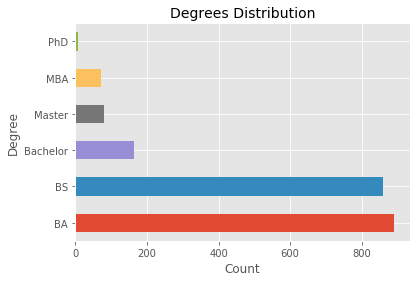

In [25]:
degree.plot.barh(x='Degree',y='Count',legend=False)
plt.title('Degrees Distribution',fontsize=14)
plt.xlabel('Count')

Obviously, most of the positions require basic degree, while some require further education degree, like Master and PhD.

Now, I want to see the distribution of the requiring work experience.

Text(0,0.5,'Years')

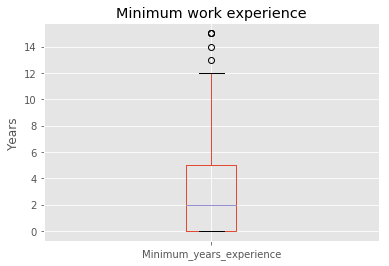

In [27]:
df.Minimum_years_experience.plot(kind='box')
plt.title('Minimum work experience')
plt.ylabel('Years')

Well, obviously, there are few outliers. It must be some real senior positions.

Text(0.5,0.98,'Minimum work experience')

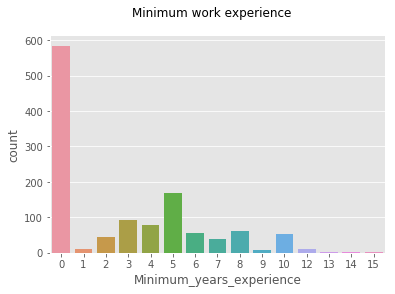

In [28]:
import seaborn as sns
sns.countplot('Minimum_years_experience',data=df)
plt.suptitle('Minimum work experience')

Basically, most of the position didn't mention experience. However, I'll dig deeper later.

In [29]:
Programming_Languages = ['Python', 'Java ','C#', 'PHP', 'Javascript', 'Ruby', 'Perl', 'SQL','Go ']

Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 96, 'Java ': 10, 'C#': 15, 'PHP': 7, 'Javascript': 3, 'Ruby': 14, 'Perl': 6, 'SQL': 69, 'Go ': 7}


In [31]:
languages_requirement = sorted(Languages.items(), key=lambda x: x[1], reverse=True)
language = pd.DataFrame(languages_requirement,columns=['Language','Count'])
language['Count'] = language.Count.astype('int')
language

,Language,Count
0,Python,96
1,SQL,69
2,C#,15
3,Ruby,14
4,Java,10
5,PHP,7
6,Go,7
7,Perl,6
8,Javascript,3


Text(0.5,0,'Count')

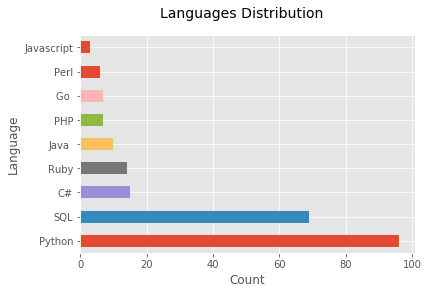

In [34]:
language.plot.barh(x='Language',y='Count',legend=False)
plt.suptitle('Languages Distribution',fontsize=14)
plt.xlabel('Count')

Python, SQL are also important, which indicates that the growing demand of data analysis

## <a id=12>Functions</a>
As a guy on twitter said, " If you write a code more than three times, write a function instead." I'm here to define the functions that I'm going to use in the next few sections

In [35]:
def MadeWordCloud(title,text):
    df_subset = df.loc[df.Title.str.contains(title).fillna(False)]
    long_text = ' '.join(df_subset[text].tolist())
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    wordcloud = WordCloud(mask=G,background_color="white").generate(long_text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.title(text,size=24)
    plt.show()

### Here, I want to create word clouds to know more about how to be qualified to be a competitive candidates for data-related positions in Google
## <a id="1">Analyst :</a>

**I'll demonstrate the original way I made word cloud here, after that, I'll replace it with the function**

In [36]:
# Refer to https://python-graph-gallery.com/262-worcloud-with-specific-shape/
# https://amueller.github.io/word_cloud/auto_examples/masked.html

df_Analyst = df.loc[df.Title.str.contains('Analyst').fillna(False)]

In [38]:
df_Analyst.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
2,Google,"Data Analyst, Product and Tools Operations, Google Technical Services",Technical Solutions,"New York, NY, United States","Collect and analyze data to draw insight and identify strategic solutions.\nBuild consensus by facilitating broad collaboration with clear communication and documentation.\nWork with cross-functional stakeholders to gather requirements, manage implementation, and drive delivery of projects.","Bachelor’s degree in Business, Economics, Statistics, Operations Research or related analytical field, or equivalent practical experience.\n2 years of work experience in business analysis.\n1 year of experience with statistical modeling, forecasting or machine learning. Experience with R, SAS or Python.\n1 year of experience developing and manipulating large datasets.",Experience partnering or consulting cross-functionally with senior stakeholders.\nProficiency in a database query language (e.g. SQL).\nAbility to manage multiple projects in an ambiguous environment.\nStrong presentation and communication skills with the ability to communicate statistical concepts and explain recommendations to non-experts.,United States,2


In [39]:
df_Analyst.Country.value_counts()

 United States     40
 Switzerland       6 
 Ireland           5 
 United Kingdom    4 
 India             1 
 Israel            1 
 Germany           1 
 Japan             1 
Singapore          1 
 France            1 
 China             1 
Name: Country, dtype: int64

In [40]:
Res_AN = ' '.join(df_Analyst['Responsibilities'].tolist())

In [41]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image

G = np.array(Image.open('../input/googlelogo/img_2241.png'))
# I spent a while to realize that the image must be black-shaped to be a mask

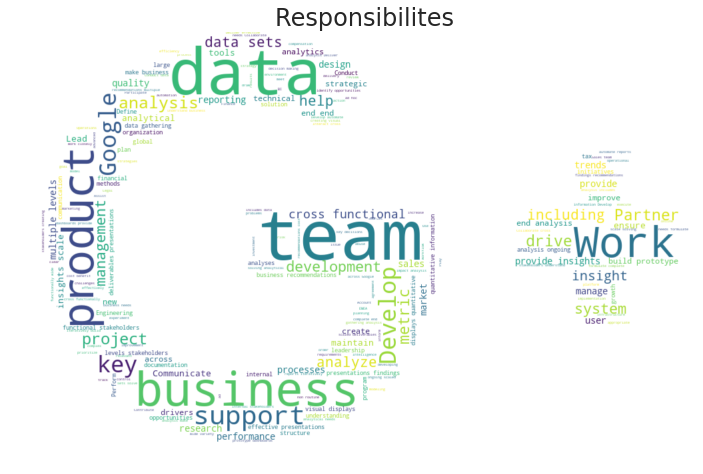

In [42]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

wordcloud = WordCloud(mask=G,background_color="white").generate(Res_AN)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Responsibilites',size=24)
plt.show()

Here we can see some keywords to know more about what a Data Analyst do in Google

### Keywords

* Criteria : Data/Team/Product/Business/Work
* Insight : strategic/quality/key/projects/plan/identify/analysis/action/business/infrastructure
* Audience : sales/operation/stakeholders
* Verb : maintain/improve/support/model/draw/customize/identify/provide
* Characteristic : leadership/quantitative/efficiency

To sum up in a sentence :

**Looking for analysts with business and data knowledge, familiar with product to work as a team**

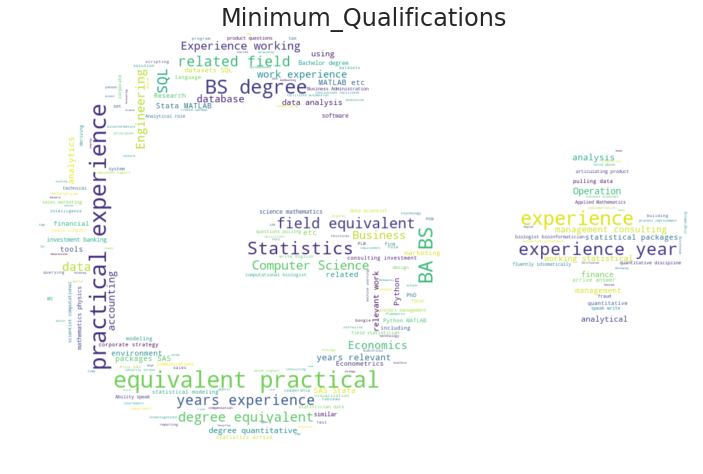

In [43]:
MadeWordCloud('Analyst','Minimum_Qualifications')

Here we can see some keywords to know how to meet minimum requirements to be a Data Analyst in Google

### Keywords

* Fileds : Business/Computer Science/Mathematics/Statistics/Economics/Engineering
* Degree : BS/BA
* Languages : Python/SAS/JAVA/SQL
* Tools : Tableau

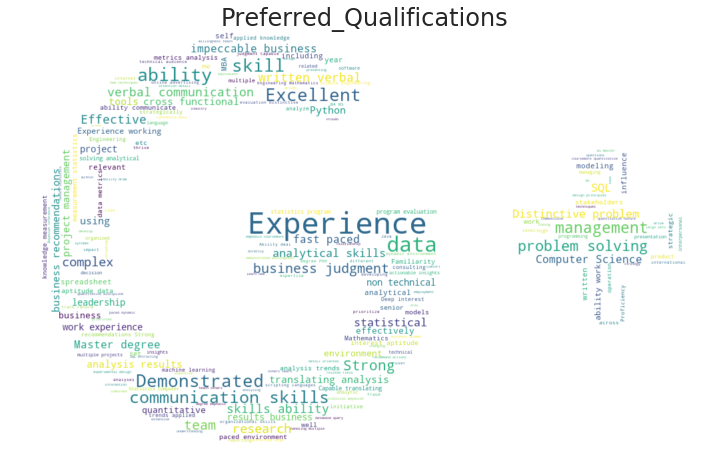

In [44]:
MadeWordCloud('Analyst','Preferred_Qualifications')

Here we can see some keywords to know how to be more competitive candidates to be a Data Analyst in Google

### Keywords

* Fileds : Business/Computer Science/Mathematics/Statistics
* Skills : Oral/Written/Comunication/Management
* Experience : Consulting/Analytics/Developing/Cross-functioned

### <a id="1.1">I want to know what Google think about Python vs R</a>

In [45]:
DataSkill = [' R','Python','SQL','SAS']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)

{' R': 14, 'Python': 13, 'SQL': 27, 'SAS': 12}


### And then, the degrees

In [46]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 42, 'BS': 41, 'Bachelor': 6, 'MBA': 0, 'Master': 2, 'PhD': 5}


In [47]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Analyst['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 14, 'BS': 5, 'Bachelor': 1, 'MBA': 9, 'Master': 13, 'PhD': 11}


**It seems that Google do prefer a further education degree like master or PhD**

Text(0.5,0.98,'Minimum work experience')

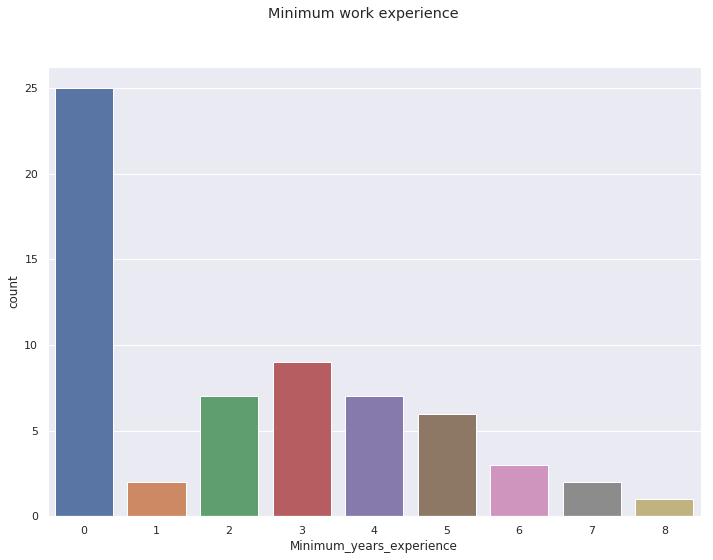

In [49]:
sns.countplot('Minimum_years_experience',data=df_Analyst)
plt.suptitle('Minimum work experience')

Most of the positions don't require work experience or didn't mention it. However, we can see some of them require 2-5 years experience.

## <a id="2">Developer</a>

In [50]:
df_Developer = df.loc[df.Title.str.contains('Developer').fillna(False)]

In [51]:
df_Developer.Country.value_counts()

 United States     5
 United Kingdom    3
 Ireland           2
 Japan             2
Name: Country, dtype: int64

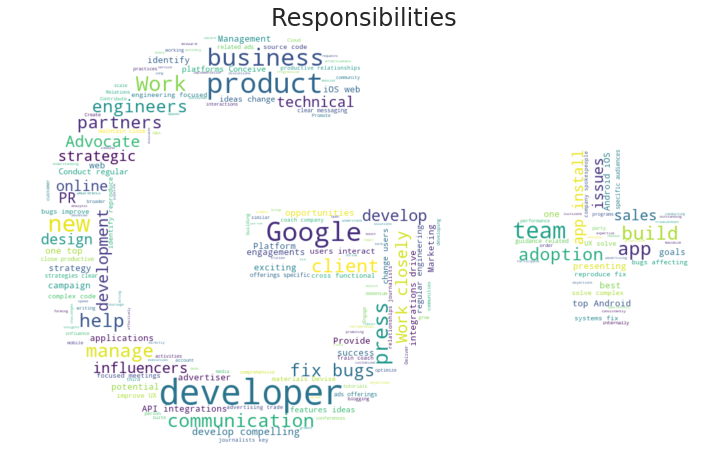

In [52]:
MadeWordCloud('Developer','Responsibilities')

### Keywords

* Fileds : Business
* Skills : Manage/Comunication/Management
* Experience : Engineers/Sales/Developer/Android/iOS

I found that the developer positions in Google actually requires some leader's characteristics! It seems that Google don't want an engineer that only know how to code but play a team leader, or even more

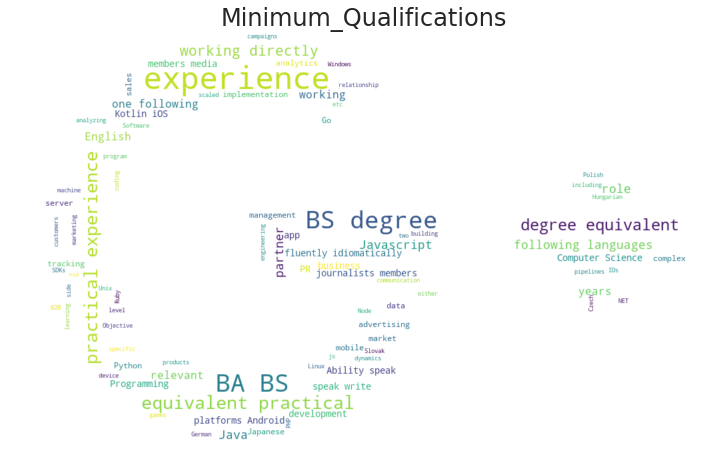

In [53]:
MadeWordCloud('Developer','Minimum_Qualifications')

### Keywords

* Degrees : BA/BS
* Languages : Go/Kotlin/Javascipt/Python/Java
* Criteria : practical experience/degree

The main point for this plot is mostly about experience. It seems that the most importanat thing to be a developer at Google

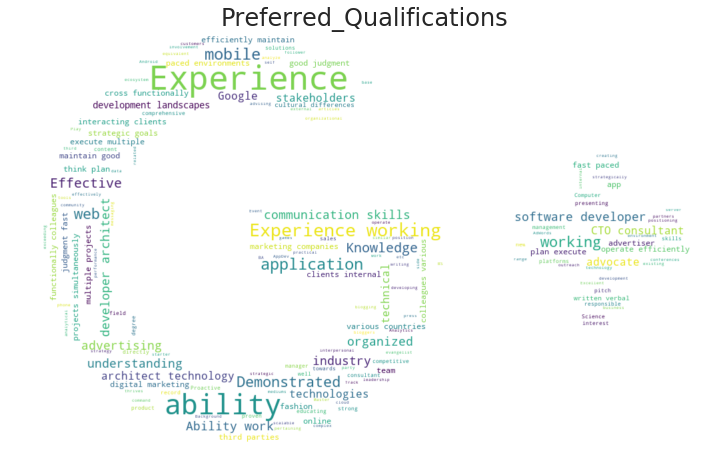

In [54]:
MadeWordCloud('Developer','Preferred_Qualifications')

### Keywords

* Criteria : Effective/Ability/Knowledge/Experience

I'll sum up this plot by one sentence :
**Looking for developer that can work effectively and organizedly, having related experience and knowledge, and understanding industry and stakeholders.**

### <a id="2.1">Also, I want to check the languages requirements of developer positions</a>

In [55]:
DataSkill = ['Java ','Javascript','Go ','Python','Kotlin','SQL']

DataSkills = dict((x,0) for x in DataSkill)
for i in DataSkill:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in DataSkill:
        DataSkills[i] = x
        
print(DataSkills)

{'Java ': 0, 'Javascript': 3, 'Go ': 0, 'Python': 2, 'Kotlin': 3, 'SQL': 0}


### Of course, degrees as well

In [56]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Minimum_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 12, 'BS': 12, 'Bachelor': 0, 'MBA': 0, 'Master': 0, 'PhD': 0}


In [57]:
Degrees = dict((x,0) for x in Degree)
for i in Degree:
    x = df_Developer['Preferred_Qualifications'].str.contains(i).sum()
    if i in Degrees:
        Degrees[i] = x
        
print(Degrees)

{'BA': 1, 'BS': 1, 'Bachelor': 0, 'MBA': 0, 'Master': 1, 'PhD': 0}


**Compare to those of Analyst, Google don't actually prefer candidates with a further education degree.**
**I guess it's because there are many theories, like mathematics, statistics, calculus required for analysts** 

Text(0.5,0.98,'Minimum work experience')

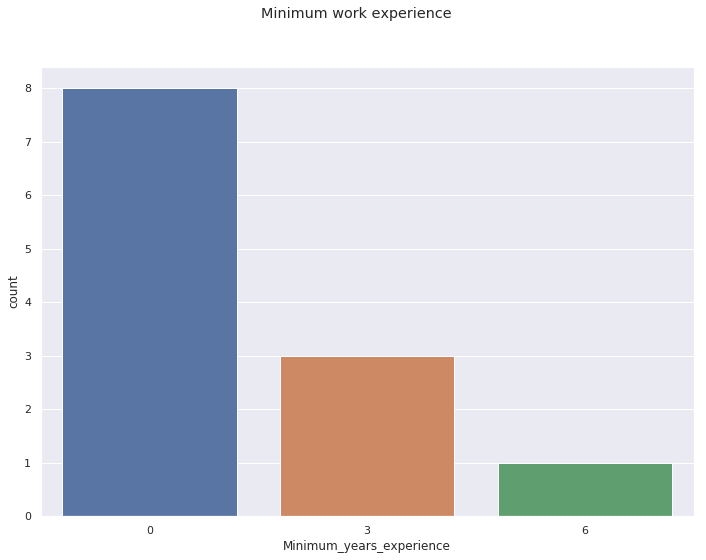

In [58]:
sns.countplot('Minimum_years_experience',data=df_Developer)
plt.suptitle('Minimum work experience')

Though most of the positions didn't mention the required work experience, we can still see 3 years experience might be a good qualification.

## <a id="3">MBA Intern</a>

I'm interested in these MBA Intern positions since it's also happening in my country, Taiwan, too. I wonder what they need to get the position and if they need to know how to code, what languages they need, etc. So, another time when Word Cloud come to be useful.

In [59]:
df_MBA = df.loc[df.Title.str.contains('MBA').fillna(False)]

In [61]:
df_MBA.head(1)

,Company,Title,Category,Location,Responsibilities,Minimum_Qualifications,Preferred_Qualifications,Country,Minimum_years_experience
343,Google,MBA Intern (Korean-English Bilingual) 2018,Business Strategy,"Seoul, South Korea",Responsibilities vary by role.,Must be pursuing a full-time MBA program with an expected graduation date between December 2018 and June 2019.\nBe able to complete a minimum 10 week program at the Seoul office in 2018.\nAbility to speak and write in English and Korean fluently and idiomatically.,"3 years of relevant work experience in the areas of mobile apps and games, mobile business, distribution channels, and competitive landscape.\nDemonstrated passion for mobile apps and games, mobile technology, and the broader mobile business.\nExcellent analytical skills, with the ability to overcome strategic business challenges.\nExcellent critical-thinking skills, with the ability to demonstrate and maintain self-motivation.",South Korea,0


In [62]:
df_MBA.Category.value_counts()

Business Strategy    36
Administrative       30
Name: Category, dtype: int64

In [63]:
df_MBA.Country.value_counts()

 United States     32
 China             8 
 Taiwan            4 
 Thailand          4 
Singapore          4 
 Indonesia         4 
 South Korea       4 
Hong Kong          4 
 Ireland           1 
 United Kingdom    1 
Name: Country, dtype: int64

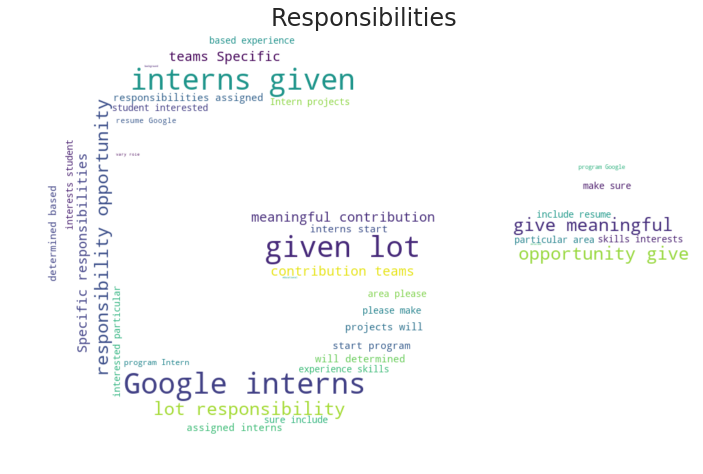

In [64]:
MadeWordCloud('MBA','Responsibilities')

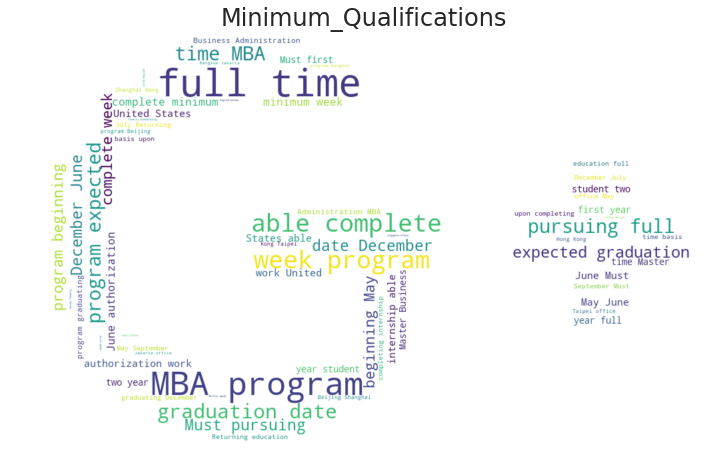

In [65]:
MadeWordCloud('MBA','Minimum_Qualifications')

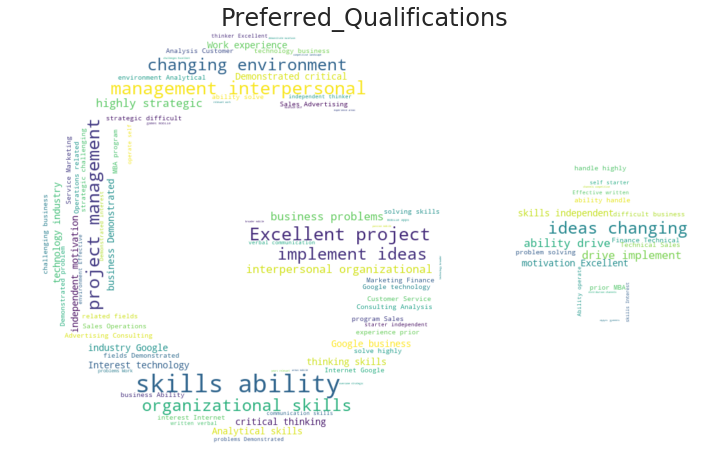

In [66]:
MadeWordCloud('MBA','Preferred_Qualifications')

OK, so I finally see some criteria here:

* Soft skills : Management/Organizational
* Characteristics : Strategic/Independent/Changing environment
* Good to have : Project/interest of technology

### <a id="3.1">How about the languages</a>

In [67]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_MBA['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 0, 'Java ': 0, 'C#': 0, 'PHP': 0, 'Javascript': 0, 'Ruby': 0, 'Perl': 0, 'SQL': 0, 'Go ': 0}


In [68]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_MBA['Preferred_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 0, 'Java ': 0, 'C#': 0, 'PHP': 0, 'Javascript': 0, 'Ruby': 0, 'Perl': 0, 'SQL': 0, 'Go ': 0}


Text(0.5,0.98,'Minimum work experience')

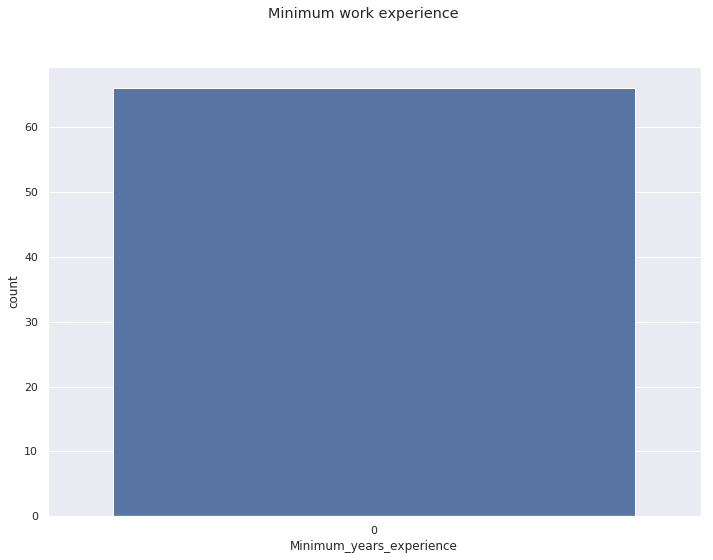

In [69]:
sns.countplot('Minimum_years_experience',data=df_MBA)
plt.suptitle('Minimum work experience')

We can see that since it's MBA intern positions, there is no need for work experience

## <a id="4">Sales</a>

In [70]:
df_Sales = df.loc[df.Title.str.contains('Sales').fillna(False)]

In [71]:
df_Sales.Category.value_counts()

Sales & Account Management      83
Technical Solutions             12
Sales Operations                12
Product & Customer Support      11
Partnerships                    8 
Business Strategy               3 
Legal & Government Relations    2 
Program Management              2 
Marketing & Communications      1 
People Operations               1 
Name: Category, dtype: int64

In [72]:
df_Sales.Country.value_counts()[:5]

 United States    48
 Ireland          26
 Germany          11
 Japan            7 
Singapore         7 
Name: Country, dtype: int64

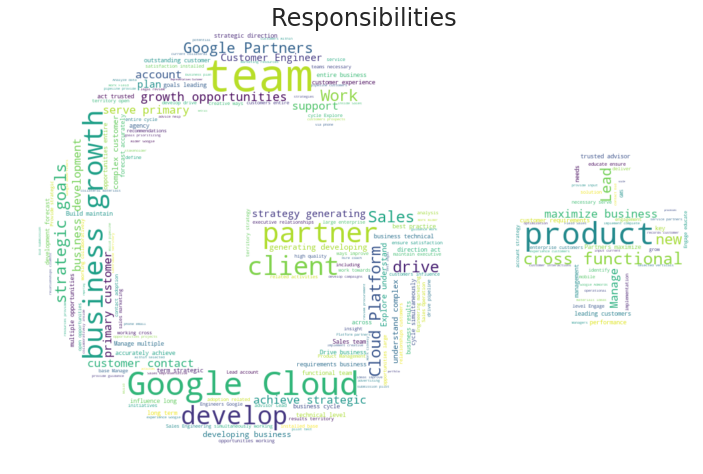

In [73]:
MadeWordCloud('Sales','Responsibilities')

There are a lot of words in this plot. However, I can still sum it up:

* Soft skills : Management/Plan
* Characteristics : Cross functional/Strategic
* Good to be familiar with : Product/Google Cloud Platform/Client/Partner/Develop

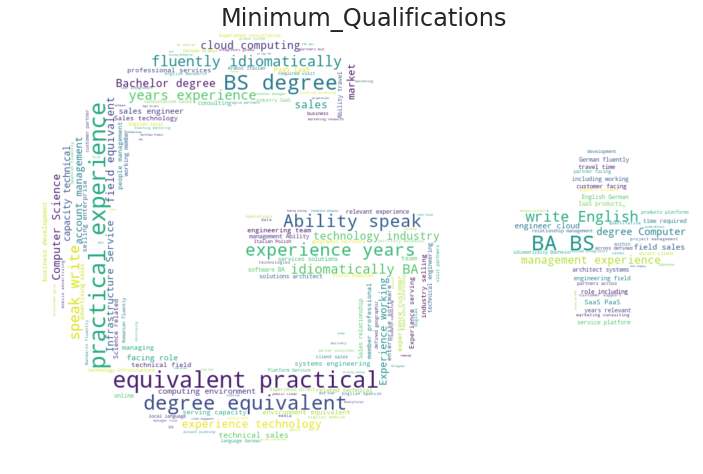

In [74]:
MadeWordCloud('Sales','Minimum_Qualifications')

There are a lot of words in this plot. However, I can still sum it up:

* Degree : BA/BS/Bachelor
* Speaking : Fluentual/Idiomatically/English
* Characteristics : Experienced/Practical
* Good to be familiar with : Cloud computing

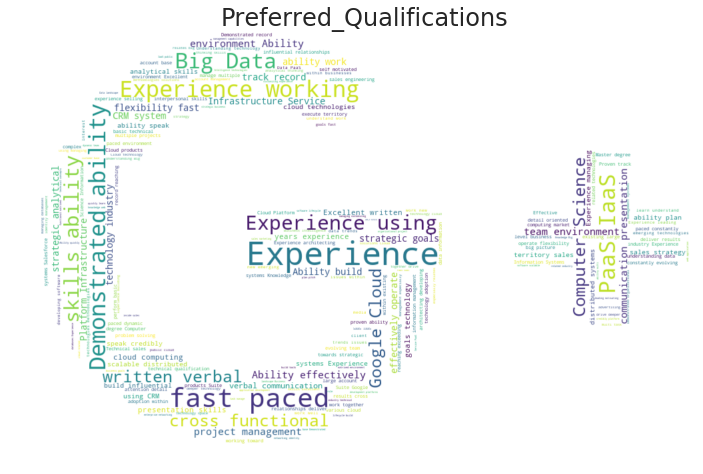

In [75]:
MadeWordCloud('Sales','Preferred_Qualifications')

There are a lot of words in this plot. However, I can still sum it up:

* Skills : Project Management
* Characteristics : Fast Paced/Demonstrated/Cross functional/Effectively/Experienced
* Good to be familiar with : PaaS/IaaS/Big Data/Google Cloud/Computer Science

### <a id="4.1">Now, let's talk about the languages</a>

In [76]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Minimum_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 0, 'Java ': 0, 'C#': 0, 'PHP': 0, 'Javascript': 0, 'Ruby': 0, 'Perl': 0, 'SQL': 6, 'Go ': 0}


In [77]:
Languages = dict((x,0) for x in Programming_Languages)
for i in Languages:
    x = df_Sales['Preferred_Qualifications'].str.contains(i).sum()
    if i in Languages:
        Languages[i] = x
        
print(Languages)

{'Python': 2, 'Java ': 1, 'C#': 1, 'PHP': 0, 'Javascript': 0, 'Ruby': 2, 'Perl': 0, 'SQL': 3, 'Go ': 0}


As I expected, some of the sales need to know SQL. And since some sales are in techical department, they need to know some other languages.

Text(0.5,0.98,'Minimum work experience')

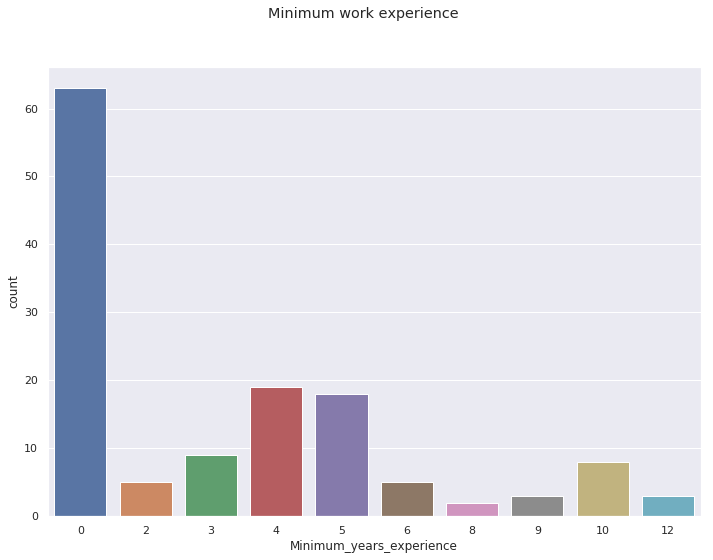

In [78]:
sns.countplot('Minimum_years_experience',data=df_Sales)
plt.suptitle('Minimum work experience')

Still, most of the positions didn't mention work experience required. However, we can see that there are more senior sales positions in Google that requrie more than 5 years experience.

## <a id="5">Microsoft Office</a>

I just came up with this question. Do Google put Microsoft Office in their requirements? Some people told me that Microsoft Office is so basic that I should not put them in my LinkedIn Skills. However, a lot of company still mention it in their position requirement. Let's see if Google do it or not.

In [79]:
Microsoft_Office = ['Excel','Powerpoint','Word','Microsoft']

MO = dict((x,0) for x in Microsoft_Office)
for i in MO:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Microsoft_Office:
        MO[i] = x
        
print(MO)

{'Excel': 0, 'Powerpoint': 0, 'Word': 5, 'Microsoft': 0}


Cool, so Google generally agree with the idea that Microsoft Office is basic. They only mention Word. I'l say that there is no need to mention it in the requirements.

## <a id="6">Data Visualization Tools</a>

I wonder if Google has a preference about the data visualization. There are some leaders in the field, like Tableau, Power BI, Qlik, and Google Visual Studio. Let me check if these are in the minimum requirements and preference requirements.

In [80]:
DV_Tools = ['Tableau','Power BI','Qlik','Data Studio','Google Analytics','GA']

DV = dict((x,0) for x in DV_Tools)
for i in DV:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in DV_Tools:
        DV[i] = x
        
print(DV)

{'Tableau': 8, 'Power BI': 0, 'Qlik': 0, 'Data Studio': 1, 'Google Analytics': 5, 'GA': 7}


It seems that even though Google has Visual Studio made by themselves, Tableau is still taking lead in the field.

## <a id="7">Statistical Analysis Tools</a>

I wonder if Google do prefer any of the statistical analysis tools. In my acknowledge, there are SPSS, R, Matlab, Excel, Google Spreadsheet, and SAS in this field.

In [81]:
SA_Tools = ['SPSS','R ','Matlab','Excel','Spreadsheet','SAS']

SA = dict((x,0) for x in SA_Tools)
for i in SA:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in SA_Tools:
        SA[i] = x
        
print(SA)

{'SPSS': 6, 'R ': 19, 'Matlab': 4, 'Excel': 0, 'Spreadsheet': 0, 'SAS': 18}


So, there are a variety of preference of statistical analysis tools in Google. However, I think most of them prefer R and SAS instead. Still, I'm surprised to see that they do mention SPSS in the requriement.

## <a id="8">Let's see the positions in the US</a>

In [82]:
df_US = df.loc[df.Country == ' United States']

In [83]:
df_US_Type = df_US.Category.value_counts()
df_US_Type = df_US_Type.rename_axis('Type').reset_index(name='counts')

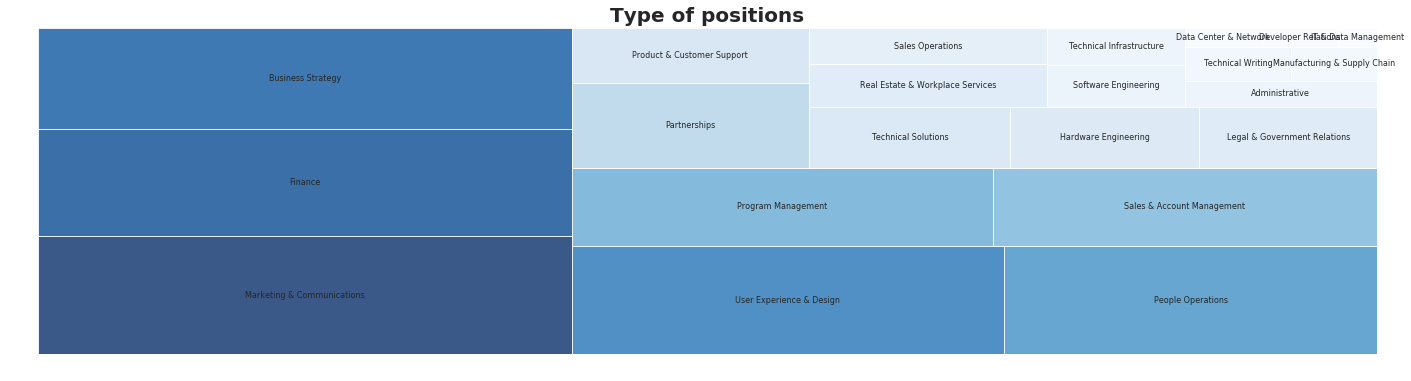

In [85]:
import squarify
import matplotlib
matplotlib.rcParams.update({'font.size': 8})
cmap = matplotlib.cm.Blues
norm = matplotlib.colors.Normalize(vmin=min(df_US_Type.counts), vmax=max(df_US_Type.counts))
colors = [cmap(norm(value)) for value in df_US_Type.counts]
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(24, 6)
squarify.plot(sizes=df_US_Type['counts'], label=df_US_Type['Type'], alpha=.8, color=colors)
plt.title('Type of positions',fontsize=20,fontweight="bold")
plt.axis('off')
plt.show()

## <a id="9">PMs (Product Manager, Project Manager, and Program Manager</a>

I wonder how is the distribution of PMs in Google. In my opinion, Project Manager might be the most of them since project management is important in each position category.

In [86]:
PM_positions = ['Product Manager','Project Manager','Program Manager']

PM = dict((x,0) for x in PM_positions)
for i in PM:
    x = df['Title'].str.contains(i).sum()
    if i in PM_positions:
        PM[i] = x
        
print(PM)

{'Product Manager': 1, 'Project Manager': 7, 'Program Manager': 41}


Well, different from my expectation, it turns out that most of them are program managers. It does make sense because Google is more like a Software as a Service company in many aspects.   
However, I still want to see if Jira, scrum, and agile, those project management phrases are mentioned or not.

In [91]:
Project_Management_words = ['Jira','scrum','agile']

Project_Management = dict((x,0) for x in Project_Management_words)
for i in Project_Management:
    x = df['Minimum_Qualifications'].str.contains(i).sum()
    if i in Project_Management_words:
        Project_Management[i] = x
        
print(Project_Management)

{'Jira': 0, 'scrum': 0, 'agile': 16}


In [92]:
Project_Management = dict((x,0) for x in Project_Management_words)
for i in Project_Management:
    x = df['Preferred_Qualifications'].str.contains(i).sum()
    if i in Project_Management_words:
        Project_Management[i] = x
        
print(Project_Management)

{'Jira': 0, 'scrum': 0, 'agile': 10}


Well, obvious, I think Agile is important to many roles, and Google doesn't have specific Project Management tools preference.

## <a id="10">Pivot tables</a>

In [93]:
df_groupby_country_category = df.groupby(['Country','Category'])['Category'].count()

In [94]:
df_groupby_country_category.loc[' United States']

Category
Administrative                      7 
Business Strategy                   75
Data Center & Network               2 
Developer Relations                 2 
Finance                             79
Hardware Engineering                16
IT & Data Management                1 
Legal & Government Relations        15
Manufacturing & Supply Chain        4 
Marketing & Communications          88
Partnerships                        28
People Operations                   56
Product & Customer Support          18
Program Management                  46
Real Estate & Workplace Services    14
Sales & Account Management          42
Sales Operations                    12
Software Engineering                8 
Technical Infrastructure            7 
Technical Solutions                 17
Technical Writing                   5 
User Experience & Design            65
Name: Category, dtype: int64

In this way, I can more thoroughly see the distribution of positions in each country.

In [95]:
category_country = df.pivot_table(index=['Country','Category'],values='Minimum_years_experience',aggfunc='median')

In [96]:
category_country.loc[' United States']

,Minimum_years_experience
Category,
Administrative,0.0
Business Strategy,2.0
Data Center & Network,7.5
Developer Relations,0.0
Finance,4.0
Hardware Engineering,5.0
IT & Data Management,2.0
Legal & Government Relations,4.0
Manufacturing & Supply Chain,6.5


In [97]:
category_country.loc['Singapore']

,Minimum_years_experience
Category,
Administrative,0.0
Business Strategy,3.0
Finance,2.0
Legal & Government Relations,6.0
Partnerships,1.5
People Operations,3.0
Product & Customer Support,0.0
Program Management,5.0
Sales & Account Management,5.0


In [98]:
category_country.loc[' Taiwan']

,Minimum_years_experience
Category,
Administrative,0.0
Finance,8.0
Hardware Engineering,5.0
Legal & Government Relations,8.0
Manufacturing & Supply Chain,5.5
People Operations,7.5
Program Management,3.0
Real Estate & Workplace Services,8.0
Sales & Account Management,4.0


In [99]:
category_country.loc[' India']

,Minimum_years_experience
Category,
Marketing & Communications,8.0
Partnerships,8.0
People Operations,5.0
Product & Customer Support,6.0
Program Management,4.0
Sales & Account Management,12.0
Sales Operations,8.0
Software Engineering,5.0
Technical Solutions,1.5


We can see that the people in Legal dept required more experience than other. And so does the Supply Chain dept in the US.

**<a id=11>To sum up, there are two parts I want to talk about:</a>**

### 1. Application of this EDA

* With str.contains and re.findall, I can extract some keywords and count appearance through the dataset after I browse it roughly by myself
* I can easily find some keywords with wordcloud, then dig deeper afterward
* This can be used on large data of social network posts or articles
* Maybe sentimental analysis

### 2. What I know about Google after the research

* Basically, you need a bachelor or equivalent degree to get in Google, master and MBA can earn you a better position among the candidates
* Java and Python are three most important languages in Google, while SQL is also important to analysts and sales
* Knowing business and having good communication, management skills are great characteristic to get a job in Google
* Project management and agile methodologies might be preferred
* Tableau takes the lead of data visualization tools
* The data center in the states requires more experience than other department